<Axes: >

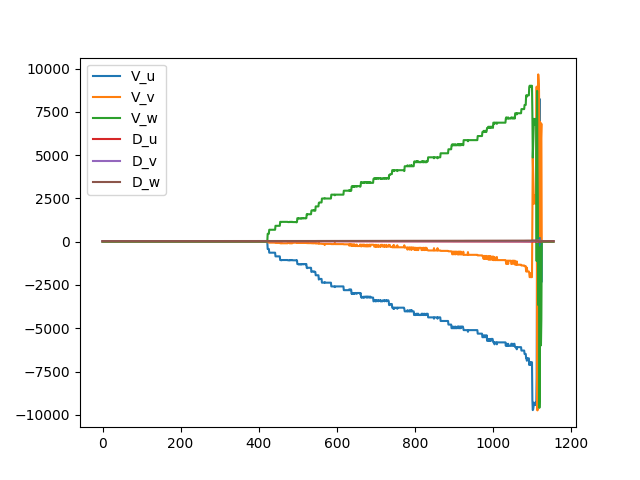

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget

# Read the text file
with open('1.txt', 'r') as file:
    lines = file.readlines()

# Extract label and number from each line
data = {}
for line in lines:
    if ':' in line:
        label, number = line.strip().split(':')
        if label in data:
            data[label].append(int(number))
        else:
            data[label] = [int(number)]

# Create a pandas DataFrame
df = pd.DataFrame(data)
df['V_u'] = df['V_u'] * 4
df['V_v'] = df['V_v'] * 4
df['V_w'] = df['V_w'] * 4
# # Plot the data
df.plot()

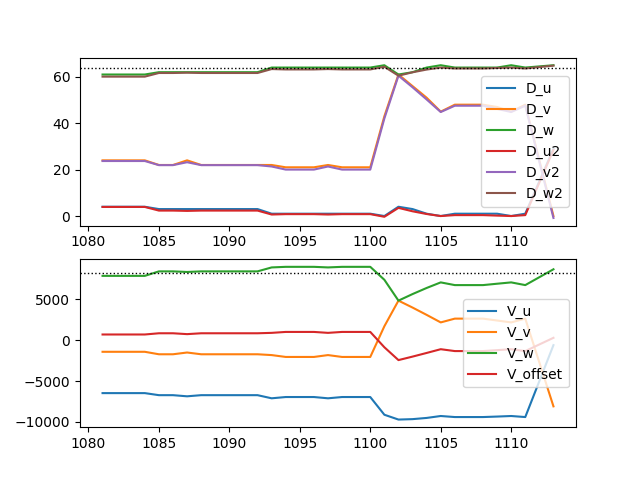

In [33]:


df['V_offset'] = (df[['V_u', 'V_v', 'V_w']].min(axis=1) + df[['V_u', 'V_v', 'V_w']].max(axis=1)) / 2


df['D_u2'] = ((df['V_u'] - df['V_offset']) / 256) + 32;
df['D_v2'] = ((df['V_v'] - df['V_offset']) / 256) + 32;
df['D_w2'] = ((df['V_w'] - df['V_offset']) / 256) + 32;


dfp = df[df['D_w'] > 60]

fig, (ax1, ax2) = plt.subplots(2, 1)
dfp.plot(y=['D_u', 'D_v', 'D_w'], ax=ax1)
dfp.plot(y=['D_u2', 'D_v2', 'D_w2'], ax=ax1)
dfp.plot(y=['V_u', 'V_v', 'V_w', 'V_offset'], ax=ax2)
ax1.axhline(y=64, color='black', linestyle=':', linewidth=1)
ax2.axhline(y=2**13, color='black', linestyle=':', linewidth=1)



plt.show()

